# 신용카드 사용자 연체 예측

안녕하세요. 데이크루 6기 코드파이터 팀입니다.   
여러분들은 신용카드 사용자분들께서 연체를 하였을때 어떤 이유로 인해서 연체가 되었다고 생각하십니까?   
네, 가족규모, 연간소득 등 다양한 요인들에 의해 연체를 했을 수도 있고 다양한 원인은 많습니다.   
이를 분석하고 다양한 신용카드 사용자 연체 예측을 위해 한번 알아보도록 합시다!

## 이번에 함께할 프로젝트는 신용카드 사용자 연체 예측입니다
### 본 프로젝트에서는 문제를 다루기위해 다양한 대회에서 일반적으로 사용되는 분류 모델 6가지를 비교해보고, 그 중 가장 성능이 높은 3가지 모델을 선택하여
### 파라미터 튜닝과함께 모델 정확도를 높이는 프로젝트를 진행하였습니다.!

# 데이터 이해 
## 제일 먼저 시행되어야 하는 활동은 데이터의 이해입니다.
## 어떤 컬럼이 있는지, 이 컬럼들은 어떤 것을 뜻하는지 이해해야, 시각화와 특징 추출할때 이해가 쉽답니다

## index 설명
- gender : 성별 
- car : 차량 소유 여부
- reality : 부동산 소유 여부
- child_num : 자녀 수
- income_total : 연간 소득
- income_type(소득분류) 
> Commercial associate - 상업담장자    
> Working : 일반 직종   
State servant : 공무원   
Pensioner : 연금수령자    
Student : 학생   

- 교육 수준
> Higher education : 대학교, 대학원과 같은 고등 교육 수준 - 학사, 석사 박사 학위   
secondary / secondary special : 중등 교육 수준, 고등학교와 유사하며 특수 교육 정도( 학습 장애, 아마 고졸이라고 생각하면 될 것 같기도)   
incomplete higher : 고등 교육 완료하지 못한 수준, 대학교 다니던 중 자퇴 느낌   
low secondary : 낮은 수준의 중등 교육 학력 낮은 중, 고등 교육 대학 입학 X   
academic degree : 학위를 받은 사람 즉, 졸업자   

- 결혼 여부
> Married : 결혼한 상태, 법 또는 종교적으로 부부가 되었음을 의미   
Civil marriage : 시민적인 방식으로 이루어진 결혼?  (결혼한 상태)   
Single/ not married : 결혼하지 않은 상태, 아직 결혼을 안함   
Window : 사별한 상태, 즉 결혼은 했으나 이혼이나 배우자가 사망한 경우에 혼인관계가 종료된 상태   

- 생활 방식
> Municipal apartment : 지방 정부나 시/도의 주택 기관이 제공하는 공공 주택   
House / apartment : 집(독립된 주거 공간), 아파트(다중 주택 건물)   
with parents : 부모님과 함께 거주함   
Co-op apartment : 공동 주택 협동조합 제공 아파트, 협동조합에 가입해 주택을 소유하고 주거하는 형태   
Rented apartment : 임대 아파트 (임대료 지불하며 주거)   
Office apartment : 주거지와 사무 공간을 병행하는 아파트 및 공간(집과 사무실 혼용)   

- DAYS_BIRTH : 출생일 - 데이터 수집 당시(0)부터 역으로 셈, 즉 -1으 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED : 업무 시작일 - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 (양수 값은 고용되지 않음을 의미)
- FLAG_MOBIL : 핸드폰 소유여부
- work_phone : 업무용 전화 소유 여부
- phone : 전화 소유 여
- email : 이메일 소유 여부
- occyp_type : 직업 유형
- family_size : 가족 규모
- begin_moth : 신용카드 발급 월 - 데이터 수집일 한달 전에 카드 발급함을 의미
----------
- **credit(Label) : 사용자의 신용카드 대금 연체를 기준으로 한 신용도 - 낮을 수록 높은 신용의 신용 카드 사용자를 의미**


# 라이브러리 임포트
- pandas 라이브러리. 데이터 조작 및 분석을 위판 라이브러리 ( 'as pd'를 통해 'pd'로 사용가능 )
- numpy 라이브러리. 파이썬의 고성능 수치 계산을 위한 라이브러리 ( 'as np' 를 통해 'np'로  사용가능 )
- Matplotlib은 Python 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리이다.
- OS 라이브러리. 다양한 운영체제 관련 인터페이스를 제공하는 라이브러리(폴터, 파일조회 등)
- xgboost : 기존 Gradient Tree Boosting 알고리즘에 과적합 방지를 위한 기법이 추가된 지도 학습 알고리즘
- lightgbm : Tree 자료 구조를 기초로 한 Gradient boosting framework, XGBoost보다 속도가 빠른 장점
#### sklearn - 사이킷런
> metrics(평가지표) 
> accuracy_score(정확도), roc_auc_score(AUC), roc_curve

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import xgboost
import lightgbm

# sklearn
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


# 다중 로지스틱 회귀, XGBoost, LightGBM, AdaBoost, randomforest, 서포트벡터머신 5개 비교
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

- data_path 변수 : Train, Test, submisson의 csv파일이 저장되어 있는 경로 설정
- pd.read_csv : read_csv('경로')를 통해 경로와 일치하는 csv파일을 불러 올 수 있는 함수
> Train : Train.csv 파일을 불러오기   
Test : Test.csv 파일을 불러오기 

## 데이터 세트 불러오기

In [3]:
data_path = 'C:/Users/jihun/Dacon/데이크루6기/신용카드 사기 거래 탐지/open/'
Train = pd.read_csv(data_path + 'train.csv')
Test = pd.read_csv(data_path + 'test.csv')

## 데이터 프레임 기본 정보 확인하기 - 컬럼 이름, 개수, 타입( 타입별 몇 개씩 있는지 )

In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

**총 19개의 컬럼 Float64(실수) : 4개, int64(정수형) : 8개, object(범주형) : 8개**
> occyp_type(직업 유형)을 제외한 18개의 컬럼 개수 26457개

## 결측치확인

데이터프레임.isnull().sum()은 각 행의 결측값(null)의 개수를 세어 몇개 있는지 종합

In [5]:
Train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

**occyp_type을 제외한 다른 컬럼에는 결측치가 존재하지 않음**
> occyp_type의 총 개수는 18286개이지만 결측치가 8171로 약 50%의 결측값을 차지함.    
> occyp_type은 직업 유형으로 연관성이 없다고 생각되고, 1. 총 개수가 맞지않음, 2. 50%의 결측값을 차지하기 때문에 삭제

In [6]:
# 컬럼삭제 
Train = Train.drop(['index','occyp_type'], axis=1)

> index는 열의 순서를 나타내므로 삭제가능

## 수정된 데이터프레임 확인 <데이터프레임.info()>

In [7]:
print(Train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

## <데이터프레임.head(-5)> 을 통해 상위,하위 5개의 행을 확인. 
#### head()의 default값은 상위 5개의 행

In [8]:
Train.head(-5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26447,M,N,Y,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,-14226,-1026,1,1,1,0,4.0,-43.0,2.0
26448,M,N,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-16280,-887,1,0,0,0,2.0,-23.0,0.0
26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,2.0,-2.0,1.0
26450,F,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-10338,-581,1,0,1,0,1.0,-37.0,2.0


## 실수형 컬럼 정수형 변환
- astype()함수   
정수형으로 형변환을 취해주면서 깔끔하고 보기 쉽게 변환

In [9]:
Train['income_total'] = Train['income_total'].astype('int')
Train['begin_month'] = Train['begin_month'].astype('int')
Train['credit'] = Train['credit'].astype('int')

Train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6,1
1,F,N,Y,1,247500,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5,1


## 데이터 간 시각화

### seaborn 라이브러리 : matplotlib을 기반으로하는 데이터 시각화 라이브러리. -> 고급 인터페이스제공 
- countplot : 범주형 변수의 발생 횟수를 확인

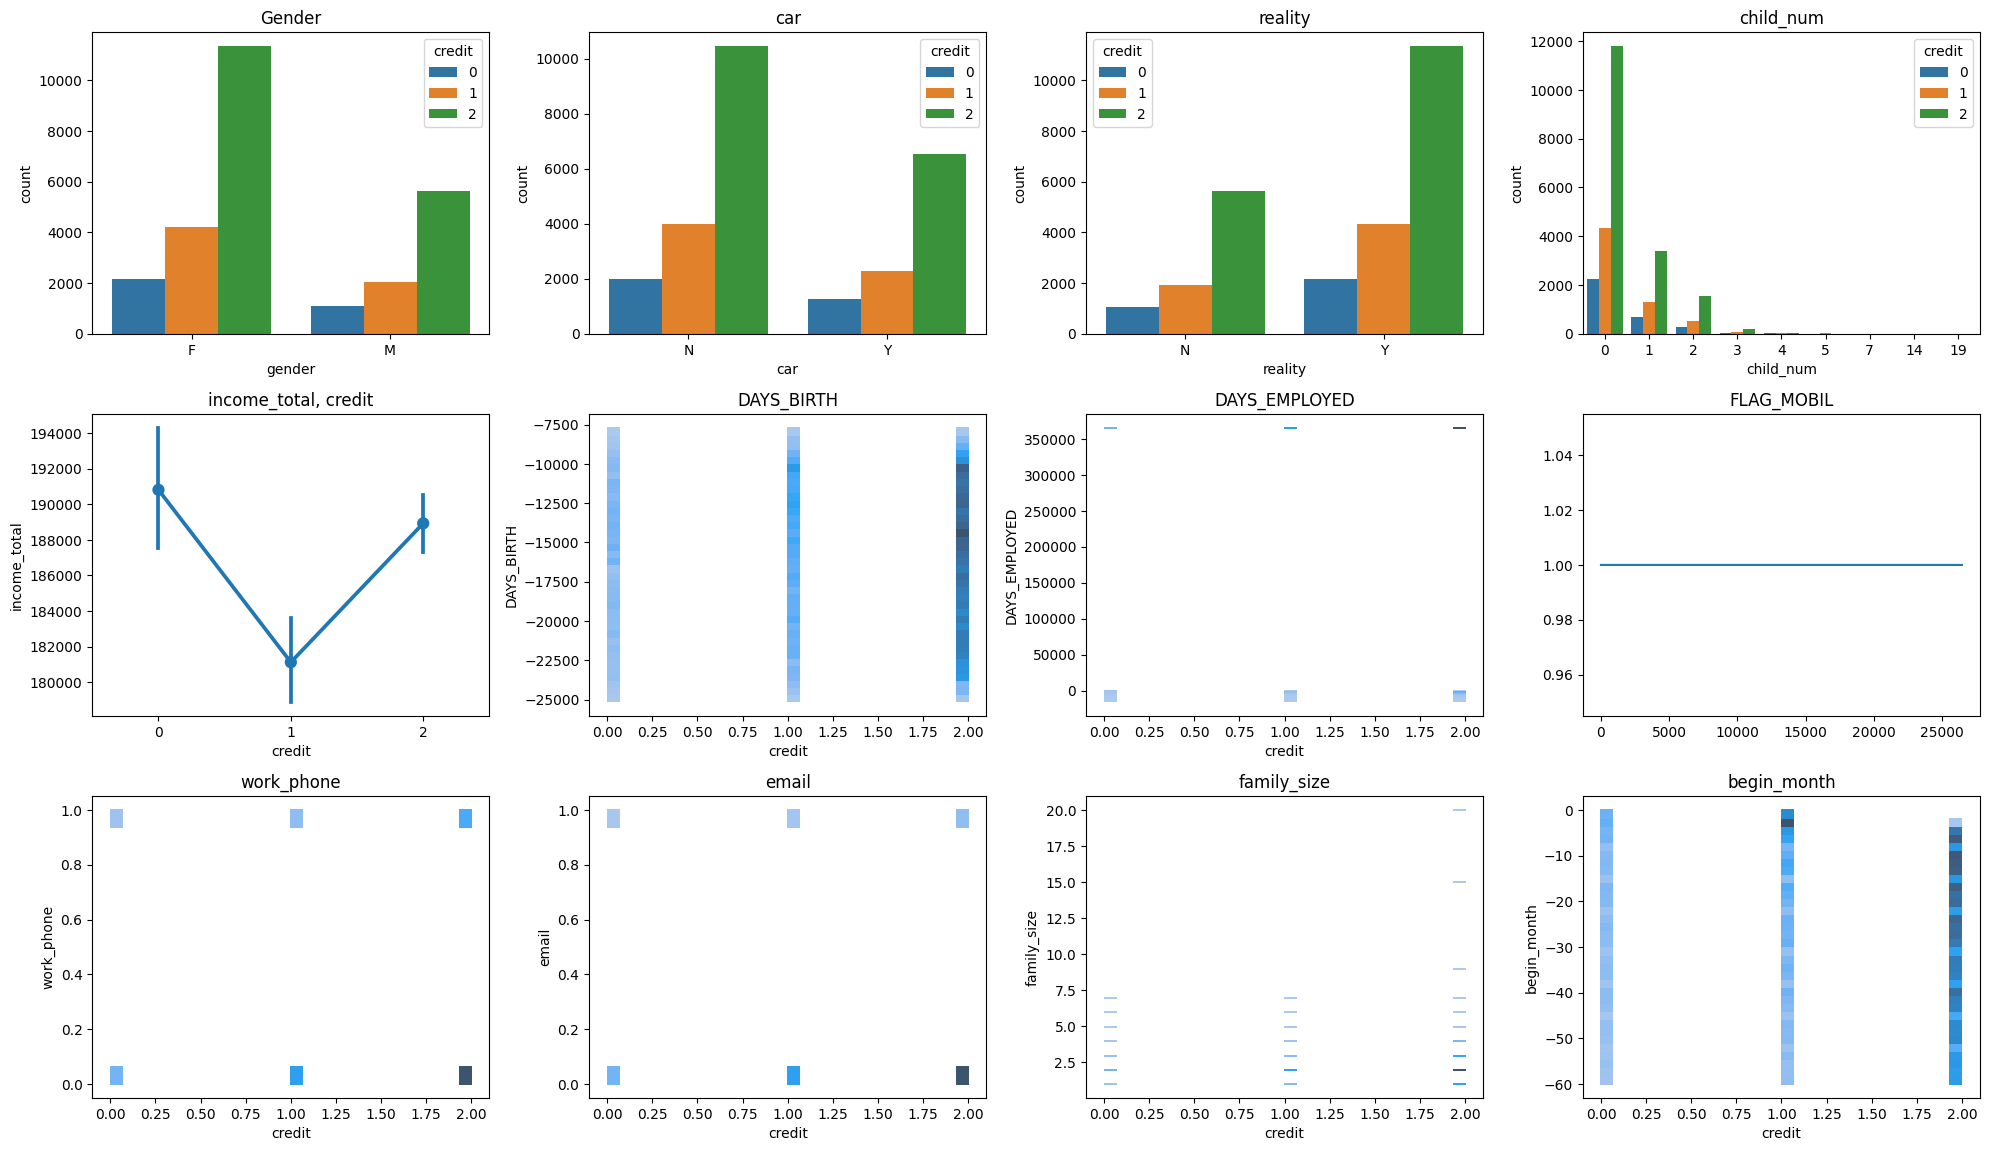

In [10]:
# 성별 - 남, 여 
plt.figure(figsize=(20,15))
plt.subplot(441)
sns.countplot(x=Train['gender'], hue=Train['credit'])
plt.title('Gender', fontsize=12)

# 자동차 유무 
plt.subplot(442)
sns.countplot(x=Train['car'], hue=Train['credit'])
plt.title('car', fontsize=12)

# 부동산 소유 유무 
plt.subplot(443)
sns.countplot(x=Train['reality'], hue=Train['credit'])
plt.title('reality', fontsize=12)

# 자녀의 수 
plt.subplot(444)
sns.countplot(data=Train, x='child_num', hue='credit')
plt.title('child_num', fontsize=12)

# 연간 소득 
plt.subplot(445)
plt.title("income_total, credit")
sns.pointplot(data=Train, x='credit', y='income_total')

plt.subplot(446)
plt.title('DAYS_BIRTH')
sns.histplot(data=Train, x='credit', y='DAYS_BIRTH')

plt.subplot(447)
plt.title('DAYS_EMPLOYED')
sns.histplot(data=Train, x='credit', y='DAYS_EMPLOYED')

plt.subplot(448)
plt.title('FLAG_MOBIL')
plt.plot(Train['FLAG_MOBIL'])

plt.subplot(449)
plt.title('work_phone')
sns.histplot(data=Train, x='credit', y='work_phone')

plt.subplot(4,4,10)
plt.title('email')
sns.histplot(data=Train, x='credit', y='email')

plt.subplot(4,4,11)
plt.title('family_size')
sns.histplot(data=Train, x='credit', y='family_size')


plt.subplot(4,4,12)
plt.title('begin_month')
sns.histplot(data=Train, x='credit', y='begin_month')



plt.tight_layout() # subplot간 겹치지 않게 자동으로 조절 

- 성별 : 남성보단 여성에서 연체의 경우가 많다.
- 자동차 유무 : 자동차가 없는 사람이 더 많으며, 연체의 경우도 더 높다 
- 부동산 유무 : 부동산을 가지고 있는 경우 연체의 경향이 더 높다
- 자녀 수 : 자녀가 없는 사람이 연체의 비율이 압도적으로 높다. ( 아마 20대의 영향이 클 수도 있고, 신혼의 경우 대출만 있을 수도 있기 때문 )
- 연간 소득 : 연간 소득이 높을 수록 안정적인 신용과, 연체 신용 두 부분에서 높게 보여졌다. 반대로 연간 소득이 낮을 경우 적당한 신용을 가지고 있다.
- 출생일 : 그림으로 결과를 유추하기 어려움. (양수 : 고용되지않은 상태, 음수 : 고용시작일(점점 작아짐))
- FLAG_MOBIL : 핸드폰 소유 여부 - 모두 소유 하고있으므로 차후 제거 필요
- work phone : 업무용 전화 소유 여부 - 업무용 핸드폰이 없는 경우에 신용이 더 낮아짐을 확인할 수 있음
- email : 개인 이메일을 소유하고 있지 않은 사람이 신용이 더 낮은 경향을 확인할 수 있음
- family_size : 가족 규모 : 0,1,2의 경우에 가족규모가 클 수록 신용이 낮은 경향이 있지만, 모든 클래스에 대해 골고루 분포해있음. - 데이터 삭제해도 될 가능성이 있다.
- begin_month : 신용카드 발급 월 - 신용이 낮은 사람의 경우 신용카드 발급 월에 상관없이 골고루 분포함을 보임

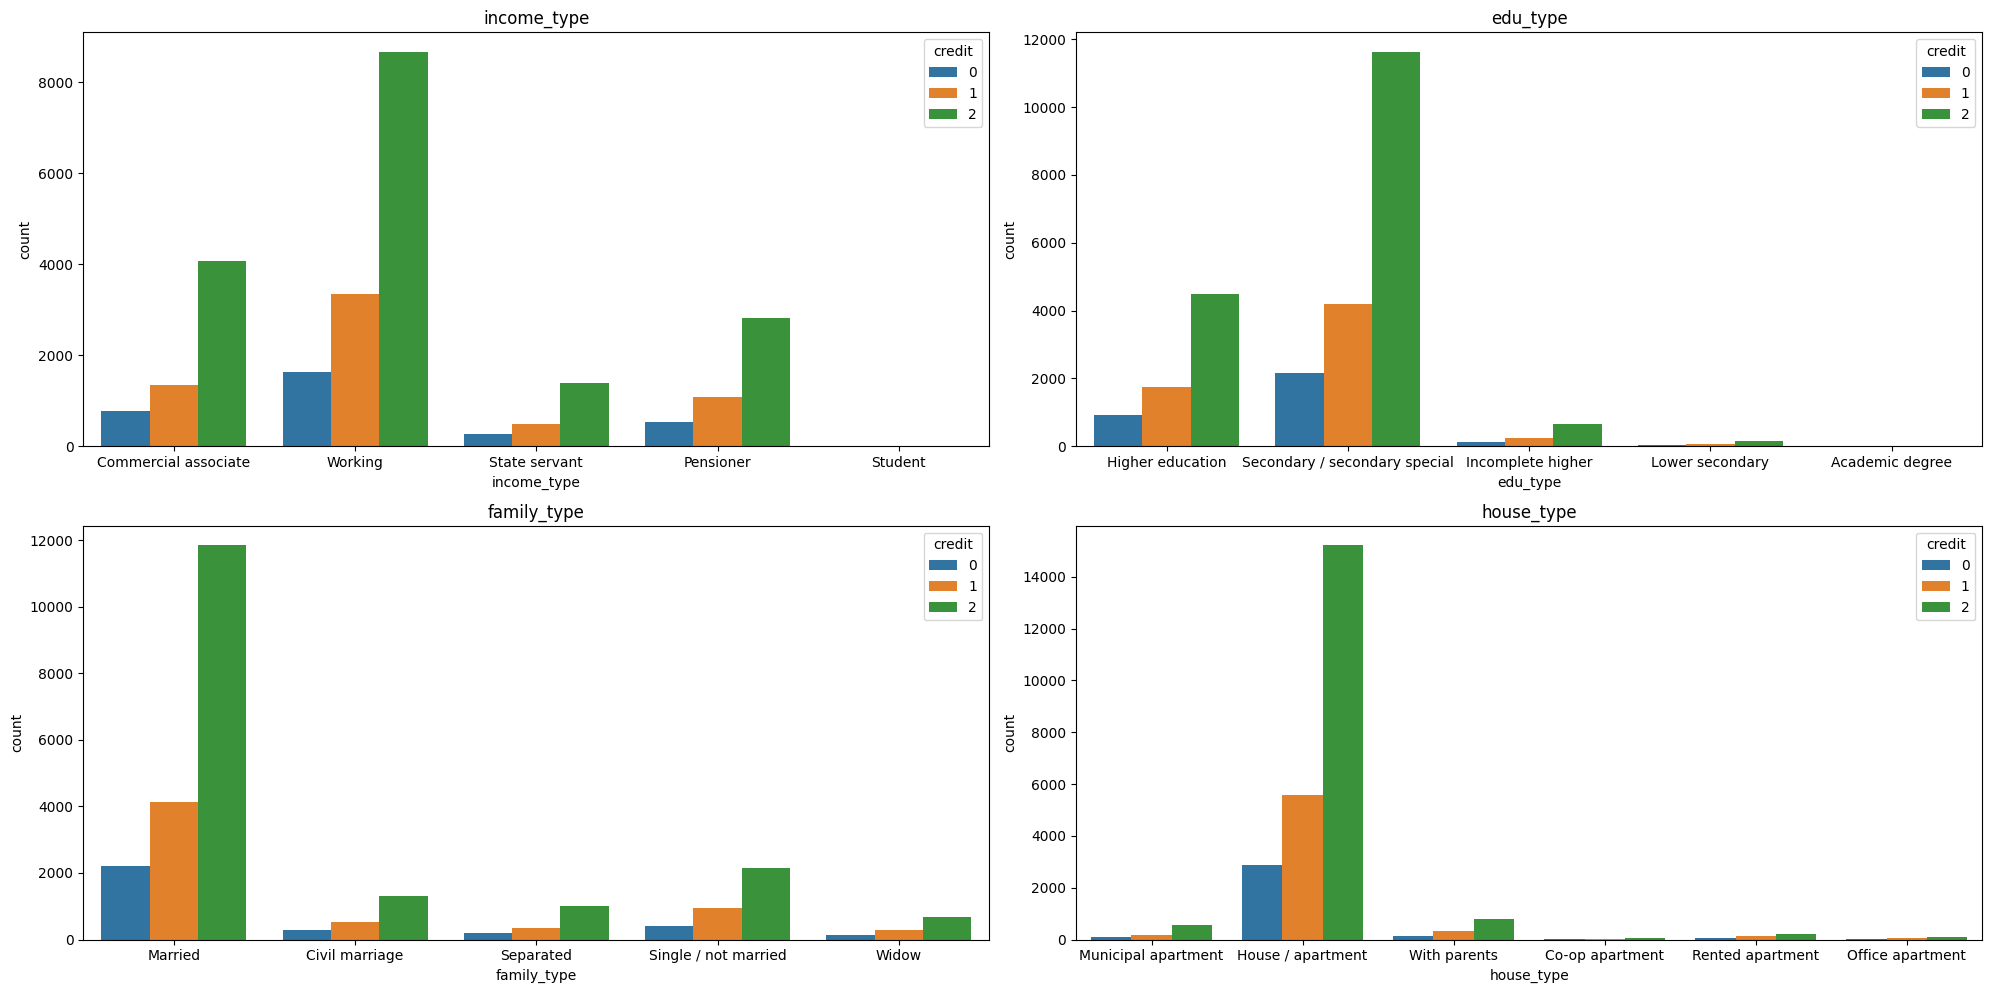

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(data=Train, x='income_type', hue='credit')
plt.title('income_type', fontsize=12)

plt.subplot(222)
sns.countplot(data=Train, x='edu_type', hue='credit')
plt.title('edu_type', fontsize=12)


plt.subplot(223)
sns.countplot(data=Train, x='family_type', hue='credit')
plt.title('family_type', fontsize=12)

plt.subplot(224)
sns.countplot(data=Train, x='house_type', hue='credit')
plt.title('house_type', fontsize=12)

plt.rc('font', size=9)
plt.tight_layout() # subplot간 겹치지 않게 자동으로 조절 

### 시각화를 통해 간단하게 내린 결론을 적용 시키기 

#### 확실한 관계가 없는 family_size(가족규모)와 FLAG_MOBIL(휴대폰 소유유무)를 삭제 

In [12]:
Train = Train.drop(['family_size','FLAG_MOBIL'], axis=1)
Train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit
0,F,N,N,0,202500,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,-6,1
1,F,N,Y,1,247500,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,-5,1


## incom_total, DAYS_BIRTH, DAYS_EMPLOYED의 변수는 값이 상당히 큰 변수들이므로 스케일링의 필요성이 있음.
## incom_total의 경우 값이 클 수록 더 높은 소득이 있으므로 MinMaxScaler로 0~1로 맞추기.



In [13]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(Train[['income_total']])
Train['income_total'] = df_minmax

Train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit
0,F,N,N,0,0.113372,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,-6,1
1,F,N,Y,1,0.142442,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,-5,1
2,M,Y,Y,0,0.273256,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,-22,2


Train[['income_total']]을 하는 이유는 scaler.fit의 인자는 2d array로 받기 때문에 2차원 배열을 만들어줌

### DAYS_BIRTH는 데이터 수집일로부터 하루 전에 태어났음을 의미하므로, 1년(365)으로 나눈 뒤 정수형을 취해 나이대 별로 구분해 접근할 수 있다. 이후 나이대별 기준으로 파생변수를 만들 수 있다

In [14]:
age = round(Train['DAYS_BIRTH']/365)
age = age.astype(int)
Train['DAYS_BIRTH'] = age
Train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit
0,F,N,N,0,0.113372,Commercial associate,Higher education,Married,Municipal apartment,-38,-4709,0,0,0,-6,1
1,F,N,Y,1,0.142442,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-31,-1540,0,0,1,-5,1
2,M,Y,Y,0,0.273256,Working,Higher education,Married,House / apartment,-52,-4434,0,1,0,-22,2


나이를 오름차순으로 정렬해보았을때 21살부터 69살까지 있는 것을 확인하였음.   
이후 20대, 30대, 40대 별로 파생변수를 만들어 원-핫인코딩 하는 개념으로 접근 

In [15]:
Train['DAYS_BIRTH'].sort_values(ascending=False)

13980   -21
20255   -21
2764    -21
9205    -21
21751   -21
         ..
24662   -69
21795   -69
24279   -69
20298   -69
18952   -69
Name: DAYS_BIRTH, Length: 26457, dtype: int32

In [16]:
# 조건에 해당하는 값을 새로운 열에 1로 표시하고 나머지는 0으로 표시

#20대
two_age = (Train['DAYS_BIRTH'] < -20) & (Train['DAYS_BIRTH']> -30)
Train['two0'] = two_age.astype(int)

three_age = (Train['DAYS_BIRTH'] <= -30) & (Train['DAYS_BIRTH']> -40)
Train['three0'] = three_age.astype(int)

four_age = (Train['DAYS_BIRTH'] <= -40) & (Train['DAYS_BIRTH']> -50)
Train['four0'] = four_age.astype(int)

five_age = (Train['DAYS_BIRTH'] <= -50) & (Train['DAYS_BIRTH']> -60)
Train['five0'] = five_age.astype(int)

six_age = (Train['DAYS_BIRTH'] <= -60) & (Train['DAYS_BIRTH']> -70)
Train['six0'] = six_age.astype(int)

Train.head(-5)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,begin_month,credit,two0,three0,four0,five0,six0
0,F,N,N,0,0.113372,Commercial associate,Higher education,Married,Municipal apartment,-38,...,0,0,0,-6,1,0,1,0,0,0
1,F,N,Y,1,0.142442,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-31,...,0,0,1,-5,1,0,1,0,0,0
2,M,Y,Y,0,0.273256,Working,Higher education,Married,House / apartment,-52,...,0,1,0,-22,2,0,0,0,1,0
3,F,N,Y,0,0.113372,Commercial associate,Secondary / secondary special,Married,House / apartment,-41,...,0,1,0,-37,0,0,0,1,0,0
4,F,Y,Y,0,0.084302,State servant,Higher education,Married,House / apartment,-41,...,0,0,0,-26,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26447,M,N,Y,2,0.046512,Working,Secondary / secondary special,Married,House / apartment,-39,...,1,1,0,-43,2,0,1,0,0,0
26448,M,N,Y,0,0.171512,Commercial associate,Higher education,Married,House / apartment,-45,...,0,0,0,-23,0,0,0,1,0,0
26449,F,N,N,0,0.040698,Working,Secondary / secondary special,Married,House / apartment,-29,...,1,1,0,-2,1,1,0,0,0,0
26450,F,N,N,0,0.127907,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-28,...,0,1,0,-37,2,1,0,0,0,0


## 새로운 열로 매핑이 되었으므로 DAYS_BIRTH  변수 삭제

In [17]:
Train = Train.drop(['DAYS_BIRTH'], axis=1)
Train.head(-2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit,two0,three0,four0,five0,six0
0,F,N,N,0,0.113372,Commercial associate,Higher education,Married,Municipal apartment,-4709,0,0,0,-6,1,0,1,0,0,0
1,F,N,Y,1,0.142442,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-1540,0,0,1,-5,1,0,1,0,0,0
2,M,Y,Y,0,0.273256,Working,Higher education,Married,House / apartment,-4434,0,1,0,-22,2,0,0,0,1,0
3,F,N,Y,0,0.113372,Commercial associate,Secondary / secondary special,Married,House / apartment,-2092,0,1,0,-37,0,0,0,1,0,0
4,F,Y,Y,0,0.084302,State servant,Higher education,Married,House / apartment,-2105,0,0,0,-26,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,F,N,N,0,0.127907,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-581,0,1,0,-37,2,1,0,0,0,0
26451,F,N,Y,0,0.113372,Working,Higher education,Married,House / apartment,-803,1,1,0,-44,1,0,1,0,0,0
26452,F,N,N,2,0.127907,State servant,Secondary / secondary special,Married,House / apartment,-1984,0,0,0,-2,1,0,1,0,0,0
26453,F,N,Y,1,0.098837,Working,Higher education,Separated,House / apartment,-2475,0,0,0,-47,2,0,0,1,0,0


#### DAYS_EMPLOYED는 양수 - 고용되지않음, 음수 - 고용됨을 뜻하며 음수에서는 클 수록 일을 오랫동안 한 의미를 가지므로 -1~1까지의 스케일링이 필요하다.

In [18]:
minmin = MinMaxScaler(feature_range=(-1, 1))
df_minmin = minmin.fit_transform(Train[['DAYS_EMPLOYED']])
Train['DAYS_EMPLOYED'] = df_minmin

Train.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit,two0,three0,four0,five0,six0
0,F,N,N,0,0.113372,Commercial associate,Higher education,Married,Municipal apartment,-0.942230,0,0,0,-6,1,0,1,0,0,0
1,F,N,Y,1,0.142442,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-0.925592,0,0,1,-5,1,0,1,0,0,0
2,M,Y,Y,0,0.273256,Working,Higher education,Married,House / apartment,-0.940786,0,1,0,-22,2,0,0,0,1,0


In [19]:
print(Train['DAYS_EMPLOYED'].min(), Train['DAYS_EMPLOYED'].max())

-1.0 1.0


## 라벨인코딩

- 성별(남/여), 자동차(있음/없음), 부동산(있음/없음) 3개의 변수 모두 유무를 나타내므로 라벨 인코더를 통해 없음(0) 있음(1)으로 변경

In [20]:
qual_col = ['gender','car','reality','income_type', 'edu_type','family_type', 'house_type' ]

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(Train[i])
    Train[i] = le.transform(Train[i])
    
    for label in np.unique(Test[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    Test[i] = le.transform(Test[i]) 
print('Done.')

Done.


In [21]:
Train.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,begin_month,credit,two0,three0,four0,five0,six0
0,0,0,0,0,0.113372,0,1,1,2,-0.942230,0,0,0,-6,1,0,1,0,0,0
1,0,0,1,1,0.142442,0,4,0,1,-0.925592,0,0,1,-5,1,0,1,0,0,0


In [22]:
Test.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0


## 훈련 데이터 라벨 추출

Y_Train의 클래스간 불균형이 있음. SMOTH 오버샘플링으로 데이터를 샘플링 

In [23]:
Y_Train = Train.pop('credit')

In [24]:
X_train = Train

In [25]:
Y_Train.value_counts()

2    16968
1     6267
0     3222
Name: credit, dtype: int64

## SMOTH over sampling

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
X_train_over,y_train_over = smote.fit_resample(X_train,Y_Train)

(X_train.shape, X_train_over.shape, Y_Train.shape, y_train_over.shape)

((26457, 19), (50904, 19), (26457,), (50904,))

In [27]:
y_train_over.value_counts()

1    16968
2    16968
0    16968
Name: credit, dtype: int64

- 샘플링전 : 26457개, 샘플링 후 : 50904개
- 모든 클래스에 대해 균형이 맞춰졌음

## 훈련, 검증, 테스트 세트 분할

In [28]:
x_train , x_test, y_train,y_test = train_test_split(X_train_over, y_train_over, stratify = y_train_over,test_size=0.2, random_state=7)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(40723, 19) (10181, 19) (40723,) (10181,)


## 테스트 데이터를 똑같이 맞춰줘야함<잊지말기>

In [29]:
Test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,-16541,-1085,1,0,1,0,NaN,2.0,-33.0


In [30]:
# 컬럼삭제  
Test = Test.drop(['index','occyp_type'], axis=1)
Test['income_total'] = Test['income_total'].astype('int')
Test['begin_month'] = Test['begin_month'].astype('int')
Test = Test.drop(['family_size','FLAG_MOBIL'], axis=1)
age = round(Test['DAYS_BIRTH']/365)
age = age.astype(int)
Test['DAYS_BIRTH'] = age
two_age = (Test['DAYS_BIRTH'] < -20) & (Test['DAYS_BIRTH']> -30)
Test['two0'] = two_age.astype(int)

three_age = (Test['DAYS_BIRTH'] <= -30) & (Test['DAYS_BIRTH']> -40)
Test['three0'] = three_age.astype(int)

four_age = (Test['DAYS_BIRTH'] <= -40) & (Test['DAYS_BIRTH']> -50)
Test['four0'] = four_age.astype(int)

five_age = (Test['DAYS_BIRTH'] <= -50) & (Test['DAYS_BIRTH']> -60)
Test['five0'] = five_age.astype(int)

six_age = (Test['DAYS_BIRTH'] <= -60) & (Test['DAYS_BIRTH']> -70)
Test['six0'] = six_age.astype(int)

Test = Test.drop(['DAYS_BIRTH'], axis=1)

b = minmax.transform(Test[['income_total']])
Test['income_total'] = b

df_minmin = minmin.transform(Test[['DAYS_EMPLOYED']])
Test['DAYS_EMPLOYED'] = df_minmin


In [31]:
Test.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,work_phone,phone,email,begin_month,two0,three0,four0,five0,six0
0,1,1,0,0,0.055233,1,4,0,1,1.000000,0,1,0,-60,0,0,0,0,1
1,0,0,1,0,0.069767,2,1,1,1,-0.963030,0,1,0,-36,0,0,0,1,0
2,0,0,1,0,0.027372,4,4,1,1,-0.918647,1,1,0,-40,0,0,1,0,0


# 모델링(일반적으로사용되는 6개 모델 분류 비교)

## XGBoost Classifier

[2 0 2 ... 1 0 2]
정확도 : 0.7816520970435125


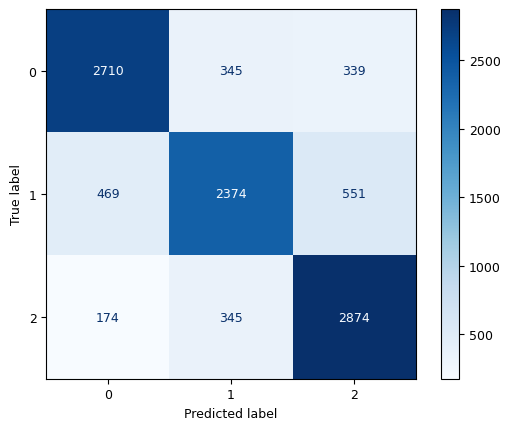

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3394
           1       0.77      0.70      0.74      3394
           2       0.76      0.85      0.80      3393

    accuracy                           0.78     10181
   macro avg       0.78      0.78      0.78     10181
weighted avg       0.78      0.78      0.78     10181



In [40]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3,gamma=0.2, min_child_weight=1, colsample_bytree=0.9, subsample=0.9, n_estimators=100)


#, max_depth=15, n_estimators=1000, learning_rate=0.1, min_child_weight=1
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
print(pred)

# 정확도
xgb_acc = accuracy_score(y_test,pred)
print('정확도 :', xgb_acc)
# 혼동행렬
xgb_confusion = confusion_matrix(y_test,pred)
xgb_disp = ConfusionMatrixDisplay(xgb_confusion, display_labels=['0','1','2'])
xgb_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
xgb_classification_report = classification_report(y_test,pred)
print(xgb_classification_report)

#### XGBoost - max_depth 튜닝

In [33]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgboost.XGBClassifier(random_state=7)
param = {
    'max_depth' : range(5,20,1)
}

search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy',n_jobs=-1, cv=5, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'mean_fit_time': array([ 15.96604748,  24.96347299,  36.24782605,  43.82229586,
          81.81873727,  89.573171  , 103.70210633, 119.11219373,
         123.86428246, 144.46446204, 149.67402039, 164.31481142,
         160.41562819, 147.00309415, 127.56840935]),
  'std_fit_time': array([2.18202164, 1.383206  , 0.94801924, 2.30895317, 2.13070332,
         2.02048692, 1.92794022, 3.46075483, 2.21681105, 2.60952759,
         3.51361185, 2.87249659, 2.79500296, 2.22821027, 4.30136542]),
  'mean_score_time': array([0.21678729, 0.28613706, 0.24277344, 0.22209826, 0.63449173,
         0.61285324, 0.67691302, 0.72089391, 0.71281233, 0.92757196,
         1.1990696 , 1.31344113, 1.06682663, 0.65938587, 0.34771047]),
  'std_score_time': array([0.18206871, 0.16745571, 0.07462834, 0.11882406, 0.17687864,
         0.19273739, 0.31794982, 0.19458346, 0.32394371, 0.29968896,
         0.26928202, 0.25097389, 0.16097233, 0.08360208, 0.04974042]),
  'param_max_depth': masked_array(data=[5, 6, 7, 8, 9, 

#### XGBoost - learning_rate 튜닝

In [36]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3, )
param = {
    'learning_rate' : [0.1, 0.2, 0.3]
}

search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3; 1/3] START learning_rate=0.1...........................................
[CV 1/3; 1/3] END ............learning_rate=0.1;, score=0.746 total time=  11.1s
[CV 2/3; 1/3] START learning_rate=0.1...........................................
[CV 2/3; 1/3] END ............learning_rate=0.1;, score=0.748 total time=  11.3s
[CV 3/3; 1/3] START learning_rate=0.1...........................................
[CV 3/3; 1/3] END ............learning_rate=0.1;, score=0.745 total time=  11.4s
[CV 1/3; 2/3] START learning_rate=0.2...........................................
[CV 1/3; 2/3] END ............learning_rate=0.2;, score=0.754 total time=  10.3s
[CV 2/3; 2/3] START learning_rate=0.2...........................................
[CV 2/3; 2/3] END ............learning_rate=0.2;, score=0.754 total time=  10.2s
[CV 3/3; 2/3] START learning_rate=0.2...........................................
[CV 3/3; 2/3] END ............learning_rate=0.2;, 

({'mean_fit_time': array([11.26671505, 10.26386388,  9.88578002]),
  'std_fit_time': array([0.12058571, 0.01095777, 0.05945813]),
  'mean_score_time': array([0.1121889 , 0.1051933 , 0.09683784]),
  'std_score_time': array([0.0103387 , 0.0094613 , 0.00254017]),
  'param_learning_rate': masked_array(data=[0.1, 0.2, 0.3],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.1},
   {'learning_rate': 0.2},
   {'learning_rate': 0.3}],
  'split0_test_score': array([0.74563536, 0.75440147, 0.75359116]),
  'split1_test_score': array([0.74826875, 0.75386769, 0.75806689]),
  'split2_test_score': array([0.74465891, 0.75055253, 0.74738471]),
  'mean_test_score': array([0.74618767, 0.75294056, 0.75301425]),
  'std_test_score': array([0.00152458, 0.0017026 , 0.00438002]),
  'rank_test_score': array([3, 2, 1])},
 {'learning_rate': 0.3},
 0.753014252955154)

#### XGBoost - learning_rate 튜닝

In [37]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3, )
param = {
    'gamma' : [0.1,0.2,0.3],
    'min_child_weight' : [1,2,3]
}

search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START gamma=0.1, min_child_weight=1...............................
[CV 1/3; 1/9] END gamma=0.1, min_child_weight=1;, score=0.750 total time=   9.7s
[CV 2/3; 1/9] START gamma=0.1, min_child_weight=1...............................
[CV 2/3; 1/9] END gamma=0.1, min_child_weight=1;, score=0.753 total time=   9.7s
[CV 3/3; 1/9] START gamma=0.1, min_child_weight=1...............................
[CV 3/3; 1/9] END gamma=0.1, min_child_weight=1;, score=0.751 total time=   9.7s
[CV 1/3; 2/9] START gamma=0.1, min_child_weight=2...............................
[CV 1/3; 2/9] END gamma=0.1, min_child_weight=2;, score=0.753 total time=   9.2s
[CV 2/3; 2/9] START gamma=0.1, min_child_weight=2...............................
[CV 2/3; 2/9] END gamma=0.1, min_child_weight=2;, score=0.754 total time=   9.2s
[CV 3/3; 2/9] START gamma=0.1, min_child_weight=2...............................
[CV 3/3; 2/9] END gamma=0.1, min_child_weight=2;,

({'mean_fit_time': array([9.73613119, 9.22309947, 8.88732966, 9.67151578, 9.15278896,
         8.79561106, 9.05510863, 9.10780446, 8.80723715]),
  'std_fit_time': array([0.01013757, 0.00930321, 0.08471354, 0.09704846, 0.07582455,
         0.02412758, 0.20063811, 0.0098799 , 0.07280531]),
  'mean_score_time': array([0.09851519, 0.0884064 , 0.08907358, 0.09355021, 0.09430512,
         0.08892552, 0.06801891, 0.08878414, 0.08727384]),
  'std_score_time': array([5.55526918e-03, 3.90417886e-03, 7.34159230e-03, 6.83221071e-04,
         4.49566384e-06, 7.60053864e-03, 7.46619984e-03, 7.81262114e-03,
         1.21882322e-02]),
  'param_gamma': masked_array(data=[0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 3, 1, 2, 3, 1, 2, 3],
               mask=[False, False, False, False, False, 

#### XGBoost - subsample,colsample_bytree 튜닝

In [38]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3,gamma=0.2, min_child_weight=1 )
param = {
    'subsample':[i/10.0 for i in range(6,10)],
     'colsample_bytree':[i/10.0 for i in range(6,10)]
}

search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START colsample_bytree=0.6, subsample=0.6........................
[CV 1/3; 1/16] END colsample_bytree=0.6, subsample=0.6;, score=0.740 total time=   8.8s
[CV 2/3; 1/16] START colsample_bytree=0.6, subsample=0.6........................
[CV 2/3; 1/16] END colsample_bytree=0.6, subsample=0.6;, score=0.738 total time=   8.8s
[CV 3/3; 1/16] START colsample_bytree=0.6, subsample=0.6........................
[CV 3/3; 1/16] END colsample_bytree=0.6, subsample=0.6;, score=0.734 total time=   8.9s
[CV 1/3; 2/16] START colsample_bytree=0.6, subsample=0.7........................
[CV 1/3; 2/16] END colsample_bytree=0.6, subsample=0.7;, score=0.744 total time=   8.8s
[CV 2/3; 2/16] START colsample_bytree=0.6, subsample=0.7........................
[CV 2/3; 2/16] END colsample_bytree=0.6, subsample=0.7;, score=0.742 total time=   8.9s
[CV 3/3; 2/16] START colsample_bytree=0.6, subsample=0.7........................
[CV 3/3; 2/16

({'mean_fit_time': array([ 8.81128462,  8.84633708,  8.78462656,  8.57870523,  9.70611405,
          9.63212959,  9.48340352,  9.19228665, 10.49829586, 10.51948341,
         10.31899365, 10.04229967, 12.23762488, 11.64297573, 10.74982595,
         10.39293432]),
  'std_fit_time': array([0.04759569, 0.05216507, 0.08141135, 0.07758565, 0.03387503,
         0.05269571, 0.04096418, 0.01485114, 0.01618343, 0.18729424,
         0.23397293, 0.07613653, 0.07402892, 0.14541123, 0.01131165,
         0.11964429]),
  'mean_score_time': array([0.10263062, 0.09427603, 0.09706481, 0.09643372, 0.10097186,
         0.09101423, 0.10294064, 0.0993638 , 0.09763718, 0.11218786,
         0.11591156, 0.11023649, 0.1066405 , 0.11510762, 0.0963165 ,
         0.11508115]),
  'std_score_time': array([5.49478210e-03, 5.04886018e-05, 3.90358632e-03, 3.01344652e-03,
         9.60452238e-03, 1.85749230e-03, 8.35746219e-03, 4.55866123e-03,
         8.91263641e-03, 5.70389964e-03, 1.53216305e-02, 5.56730248e-04,
     

In [39]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3,gamma=0.2, min_child_weight=1, colsample_bytree=0.9, subsample=0.9)
param = {
    'n_estimators':[100, 300, 500, 700, 900, 1100, 1300, 1500]

}

search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START n_estimators=100............................................
[CV 1/3; 1/8] END .............n_estimators=100;, score=0.754 total time=  10.3s
[CV 2/3; 1/8] START n_estimators=100............................................
[CV 2/3; 1/8] END .............n_estimators=100;, score=0.753 total time=  10.3s
[CV 3/3; 1/8] START n_estimators=100............................................
[CV 3/3; 1/8] END .............n_estimators=100;, score=0.749 total time=  11.0s
[CV 1/3; 2/8] START n_estimators=300............................................
[CV 1/3; 2/8] END .............n_estimators=300;, score=0.753 total time=  30.3s
[CV 2/3; 2/8] START n_estimators=300............................................
[CV 2/3; 2/8] END .............n_estimators=300;, score=0.754 total time=  30.9s
[CV 3/3; 2/8] START n_estimators=300............................................
[CV 3/3; 2/8] END .............n_estimators=300;,

({'mean_fit_time': array([ 10.54378208,  30.5161895 ,  49.90352893,  68.21798563,
          87.00449999, 105.75832383, 124.1390725 , 143.25254703]),
  'std_fit_time': array([0.29361912, 0.291601  , 1.63121155, 0.29675958, 0.50452642,
         0.75384059, 0.65093849, 0.4005238 ]),
  'mean_score_time': array([0.09396704, 0.25807047, 0.37092964, 0.42828115, 0.5168488 ,
         0.60236589, 0.69546636, 0.76573571]),
  'std_score_time': array([0.00023675, 0.00629707, 0.00822204, 0.01022249, 0.00864284,
         0.01396623, 0.03205911, 0.0378244 ]),
  'param_n_estimators': masked_array(data=[100, 300, 500, 700, 900, 1100, 1300, 1500],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 100},
   {'n_estimators': 300},
   {'n_estimators': 500},
   {'n_estimators': 700},
   {'n_estimators': 900},
   {'n_estimators': 1100},
   {'n_estimators': 1300},
   {'n_estimators': 1500}],
  'split0

## AdaBoostClassifier

In [41]:
Ada_model = AdaBoostClassifier(random_state=7)
Ada_model.fit(x_train, y_train)
Ada_pred = Ada_model.predict(x_test)
print(Ada_pred)

[2 0 2 ... 0 0 2]


정확도 : 0.5193988802671643


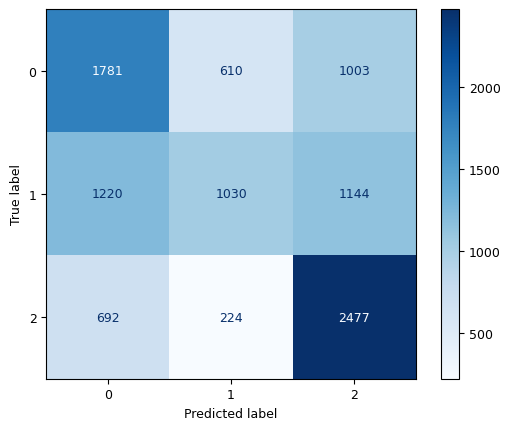

              precision    recall  f1-score   support

           0       0.48      0.52      0.50      3394
           1       0.55      0.30      0.39      3394
           2       0.54      0.73      0.62      3393

    accuracy                           0.52     10181
   macro avg       0.52      0.52      0.50     10181
weighted avg       0.52      0.52      0.50     10181



In [42]:
# 정확도
Ada_acc = accuracy_score(y_test,Ada_pred)
print('정확도 :', Ada_acc)
# 혼동행렬
Ada_confusion = confusion_matrix(y_test,Ada_pred)
Ada_disp = ConfusionMatrixDisplay(Ada_confusion, display_labels=['0','1','2'])
Ada_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
Ada_classification_report = classification_report(y_test,Ada_pred)
print(Ada_classification_report)

## RandomForestClassifier

[2 0 1 ... 1 0 2]
정확도 : 0.7593556625085944


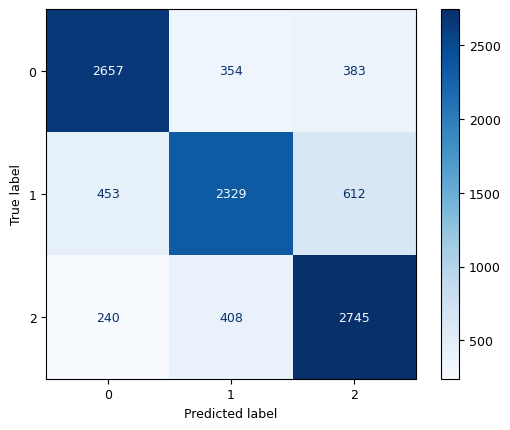

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3394
           1       0.75      0.69      0.72      3394
           2       0.73      0.81      0.77      3393

    accuracy                           0.76     10181
   macro avg       0.76      0.76      0.76     10181
weighted avg       0.76      0.76      0.76     10181



In [45]:
RF_model = RandomForestClassifier(random_state=7, min_samples_split=5, n_estimators=300)
RF_model.fit(x_train, y_train)
RF_pred = RF_model.predict(x_test)
print(RF_pred)

# 정확도
RF_acc = accuracy_score(y_test,RF_pred)
print('정확도 :', RF_acc)
# 혼동행렬
RF_confusion = confusion_matrix(y_test,RF_pred)
RF_disp = ConfusionMatrixDisplay(RF_confusion, display_labels=['0','1','2'])
RF_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
RF_classification_report = classification_report(y_test,RF_pred)
print(RF_classification_report)

In [44]:
RF_model = RandomForestClassifier(random_state=7)
param = {
    'n_estimators':[100, 300, 500, 700, 900, 1100, 1300, 1500]

}
search1 = GridSearchCV(estimator =xgb_model, param_grid = param, scoring='accuracy', cv=5, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START n_estimators=100............................................
[CV 1/5; 1/8] END .............n_estimators=100;, score=0.767 total time=  12.1s
[CV 2/5; 1/8] START n_estimators=100............................................
[CV 2/5; 1/8] END .............n_estimators=100;, score=0.764 total time=  11.9s
[CV 3/5; 1/8] START n_estimators=100............................................
[CV 3/5; 1/8] END .............n_estimators=100;, score=0.773 total time=  12.1s
[CV 4/5; 1/8] START n_estimators=100............................................
[CV 4/5; 1/8] END .............n_estimators=100;, score=0.758 total time=  11.9s
[CV 5/5; 1/8] START n_estimators=100............................................
[CV 5/5; 1/8] END .............n_estimators=100;, score=0.766 total time=  12.1s
[CV 1/5; 2/8] START n_estimators=300............................................
[CV 1/5; 2/8] END .............n_estimators=300;,

({'mean_fit_time': array([ 12.0660913 ,  34.30176573,  56.65779638,  78.967904  ,
         101.20773849, 123.63845167, 145.79831715, 167.80344362]),
  'std_fit_time': array([0.07860806, 0.12180079, 0.23424381, 0.34033773, 0.47901371,
         0.48584751, 0.50449162, 0.4871678 ]),
  'mean_score_time': array([0.06481476, 0.15123534, 0.21579676, 0.27149496, 0.3444725 ,
         0.40217781, 0.47130408, 0.51214104]),
  'std_score_time': array([0.00676924, 0.01153023, 0.01026407, 0.01673676, 0.01120325,
         0.00767518, 0.01724094, 0.02010192]),
  'param_n_estimators': masked_array(data=[100, 300, 500, 700, 900, 1100, 1300, 1500],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 100},
   {'n_estimators': 300},
   {'n_estimators': 500},
   {'n_estimators': 700},
   {'n_estimators': 900},
   {'n_estimators': 1100},
   {'n_estimators': 1300},
   {'n_estimators': 1500}],
  'split0

## SVC

In [46]:
SVC_model = SVC(random_state=7)
SVC_model.fit(x_train, y_train)
SVC_pred = SVC_model.predict(x_test)
print(SVC_pred)

[2 2 2 ... 0 0 2]


정확도 : 0.4896375601610844


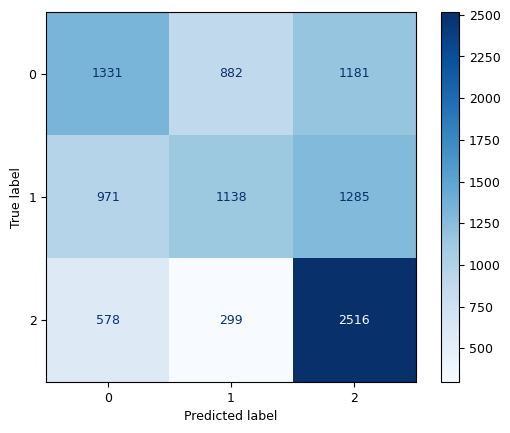

              precision    recall  f1-score   support

           0       0.46      0.39      0.42      3394
           1       0.49      0.34      0.40      3394
           2       0.51      0.74      0.60      3393

    accuracy                           0.49     10181
   macro avg       0.49      0.49      0.47     10181
weighted avg       0.49      0.49      0.47     10181



In [47]:
# 정확도
SVC_acc = accuracy_score(y_test,SVC_pred)
print('정확도 :', SVC_acc)
# 혼동행렬
SVC_confusion = confusion_matrix(y_test,SVC_pred)
SVC_disp = ConfusionMatrixDisplay(SVC_confusion, display_labels=['0','1','2'])
SVC_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
SVC_classification_report = classification_report(y_test,SVC_pred)
print(SVC_classification_report)

## LightGBMClassifier

In [ ]:
LGB_model = lightgbm.LGBMClassifier(random_state=7, max_depth=13, n_estimators=1300, num_leaves=8100, verbosity=0, force_row_wise=True)
LGB_model.fit(x_train, y_train)
LGB_pred = LGB_model.predict(x_test)
print(LGB_pred)
# 정확도
LGB_acc = accuracy_score(y_test,LGB_pred)
print('정확도 :', LGB_acc)
# 혼동행렬
LGB_confusion = confusion_matrix(y_test,LGB_pred)
LGB_disp = ConfusionMatrixDisplay(LGB_confusion, display_labels=['0','1','2'])
LGB_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
LGB_classification_report = classification_report(y_test,LGB_pred)
print(LGB_classification_report)

정확도 : 0.7833218740791671


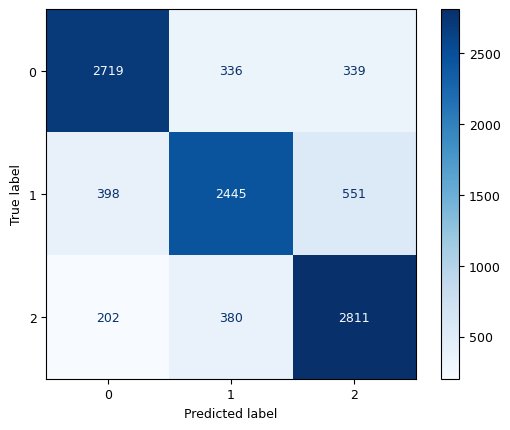

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3394
           1       0.77      0.72      0.75      3394
           2       0.76      0.83      0.79      3393

    accuracy                           0.78     10181
   macro avg       0.78      0.78      0.78     10181
weighted avg       0.78      0.78      0.78     10181



In [52]:
LGB_acc = accuracy_score(y_test,LGB_pred)
print('정확도 :', LGB_acc)
LGB_confusion = confusion_matrix(y_test,LGB_pred)
LGB_disp = ConfusionMatrixDisplay(LGB_confusion, display_labels=['0','1','2'])
LGB_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
LGB_classification_report = classification_report(y_test,LGB_pred)
print(LGB_classification_report)

- max_depth 튜닝

In [ ]:
LGB_model = lightgbm.LGBMClassifier(random_state=7, verbosity=0, force_row_wise=True)
param = {
    'max_depth':[13,15, 17, 19, 21, 23,25,27,29]

}

search1 = GridSearchCV(estimator =LGB_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

- n_estimators 튜닝

In [ ]:
LGB_model = lightgbm.LGBMClassifier(random_state=7, max_depth=13, verbose=0)
param = {
    'n_estimators':[1300, 1500, 1700]

}

search1 = GridSearchCV(estimator =LGB_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

- learning_rate 튜닝

In [ ]:
LGB_model = lightgbm.LGBMClassifier(random_state=7, max_depth=13, n_estimators=1300,verbose=0)
param = {
    'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

}

search1 = GridSearchCV(estimator =LGB_model, param_grid = param, scoring='accuracy', cv=3, verbose=10)
search1.fit(x_train,y_train)
search1.cv_results_, search1.best_params_, search1.best_score_

## logistic Regression

In [53]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
LR_pred = LR_model.predict(x_test)
print(LR_pred)

[2 2 2 ... 0 1 2]


C:\Anaconda3\envs\ecg\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정확도 : 0.4855122286612317


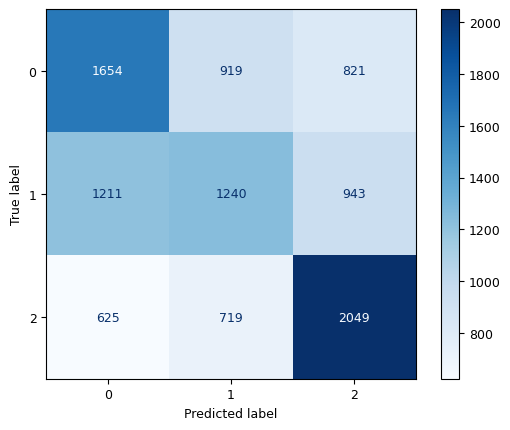

              precision    recall  f1-score   support

           0       0.47      0.49      0.48      3394
           1       0.43      0.37      0.40      3394
           2       0.54      0.60      0.57      3393

    accuracy                           0.49     10181
   macro avg       0.48      0.49      0.48     10181
weighted avg       0.48      0.49      0.48     10181



In [54]:
# 정확도
LR_acc = accuracy_score(y_test,LR_pred)
print('정확도 :', LR_acc)
# 혼동행렬
LR_confusion = confusion_matrix(y_test,LR_pred)
LR_disp = ConfusionMatrixDisplay(LR_confusion, display_labels=['0','1','2'])
LR_disp.plot(cmap=plt.cm.Blues)
plt.show()
# 분석 보고서
LR_classification_report = classification_report(y_test,LR_pred)
print(LR_classification_report)

# 최종 훈련
## 최종적으로 xgboost모델이 가장 높은 성능을 차지하였는데요! 이로 인해 xgboost모델로 최종 제출을 진행하였습니다

In [55]:
xgb_model = xgboost.XGBClassifier(random_state=7, max_depth=16, learning_rate=0.3,gamma=0.2, min_child_weight=1, colsample_bytree=0.9, subsample=0.9, n_estimators=100)
xgb_model.fit(X_train_over, y_train_over)
pred = xgb_model.predict_proba(Test)
print(pred)


[[0.0098888  0.00357484 0.9865363 ]
 [0.2732874  0.38396263 0.34274998]
 [0.01952928 0.11721907 0.8632516 ]
 ...
 [0.0035032  0.02447441 0.9720224 ]
 [0.37678263 0.40006524 0.22315207]
 [0.05714559 0.03767811 0.9051763 ]]


In [56]:
submit = pd.read_csv('C:/Users/jihun/Dacon/데이크루6기/신용카드 사기 거래 탐지/open/sample_submission.csv')

b =[]
for i in range(len(pred)):
    b.append(pred[i][0])
submit['0'] =b

c =[]
for i in range(len(pred)):
    c.append(pred[i][1])
submit['1'] =c

d =[]
for i in range(len(pred)):
    d.append(pred[i][2])
submit['2'] =d

submit.to_csv('C:/Users/jihun/Dacon/데이크루6기/신용카드 사기 거래 탐지/open/DACON_Submission_xgb.csv', index=False)
